In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_pickle("clean_data.pkl")

In [3]:
# Let's view the features of the Data
df.columns

Index(['Gender', 'Ethnicity', 'Age', 'Alcohol', 'CHOL_YN', 'HT_YN', 'Diabetes',
       'Milk', 'Meals_Out', 'Fast_Food', 'Weak_Kidneys', 'Kidney_Stones',
       'Urine_Leak', 'WalkBike', 'PAQ650', 'PAQ665', 'PAQ605', 'PAQ620',
       'Smoke_now', 'Smoke_100', 'BPXDI1', 'BPXSY1', 'BMI', 'PHAFSTHR',
       'LBXGLU', 'Work_Act', 'Rec_Act', 'HT_Diag'],
      dtype='object')

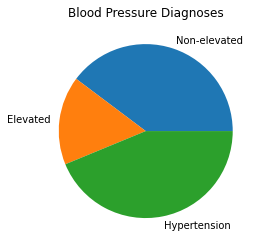

In [4]:
# Visualize the target variable: Diagnosis of Hypertension

diag_totals = df.HT_Diag.value_counts().sort_index().to_numpy()
diag_perc = 100*diag_totals/diag_totals.sum()
diag_labels = ['Non-elevated', 'Elevated', 'Hypertension'] 
fig1, ax1 = plt.subplots()
ax1.pie(diag_perc,labels = diag_labels)
ax1.set_title('Blood Pressure Diagnoses')
plt.show()

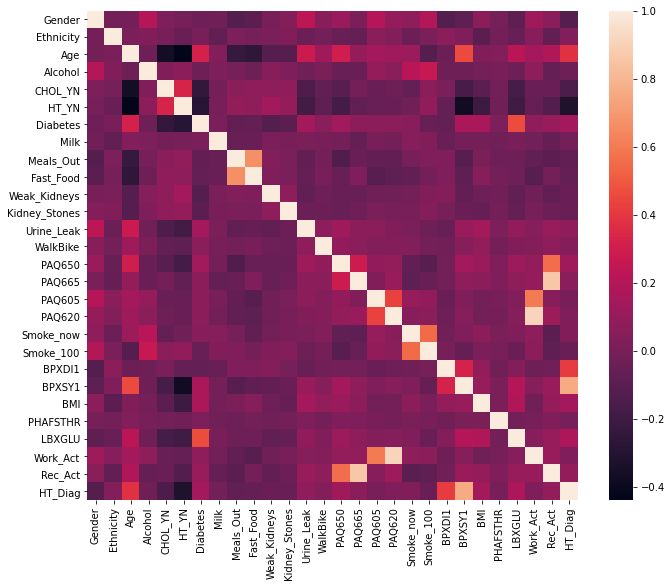

In [5]:
f, ax = plt.subplots(figsize=(11, 9))
ax = sns.heatmap(df.corr()) 

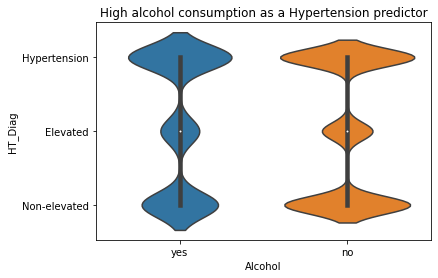

In [6]:
# Ever have 4/5 or more drinks every day?

ax = sns.violinplot(x = 'Alcohol', y = 'HT_Diag', data = df)
YN = ['yes', 'no']
ax.set_xticklabels(YN)
ax.set_yticks([0,1,2])
ax.set_yticklabels(diag_labels)
ax.set_title('High alcohol consumption as a Hypertension predictor')
plt.show()

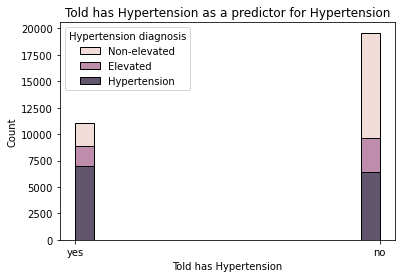

In [7]:
# HT_YN: Has SP ever been told by a doctor or other health professional
#        that they had hypertension, also called high blood pressure?

ax = sns.histplot(
        data = df,  
        hue = 'HT_Diag', x = 'HT_YN',
        multiple = 'stack') 
ax.legend_.set_title('Hypertension diagnosis') 
for t, l in zip(ax.legend_.texts, diag_labels): t.set_text(l)
ax.set_xticks([1,2])
ax.set_xticklabels(YN)
ax.set_xlabel('Told has Hypertension')
ax.set_title('Told has Hypertension as a predictor for Hypertension')

plt.show()
# Note this question only captures about 50% of those with high blood pressure

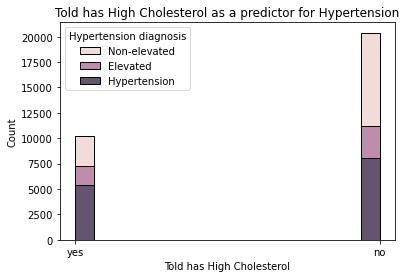

In [8]:
# CHOL_YN: Has SP ever been told by a doctor or other health professional
#          that their blood cholesterol level was high?

ax = sns.histplot(
        data = df,  
        hue = 'HT_Diag', x = 'CHOL_YN',
        multiple = 'stack') 
ax.legend_.set_title('Hypertension diagnosis') 
for t, l in zip(ax.legend_.texts, diag_labels): t.set_text(l)
ax.set_xticks([1,2])
ax.set_xticklabels(YN)
ax.set_xlabel('Told has High Cholesterol')
ax.set_title('Told has High Cholesterol as a predictor for Hypertension')

plt.show()

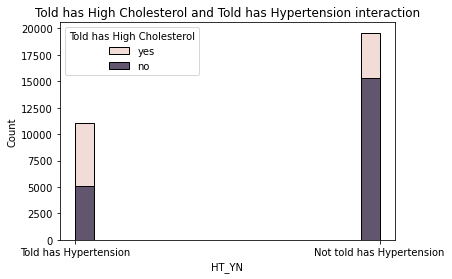

In [9]:
# Are variables HT_YN, CHOL_YN (close to) independent?

ax = sns.histplot(
        data = df,  
        x = 'HT_YN', hue = 'CHOL_YN',
        multiple = 'stack') 
ax.legend_.set_title('Told has High Cholesterol') 
for t, l in zip(ax.legend_.texts, YN): t.set_text(l)
ax.set_xticks([1,2])
ax.set_xticklabels(['Told has Hypertension', 'Not told has Hypertension'])
ax.set_title('Told has High Cholesterol and Told has Hypertension interaction')

plt.show()
# The variables are correlated but not entirely dependent

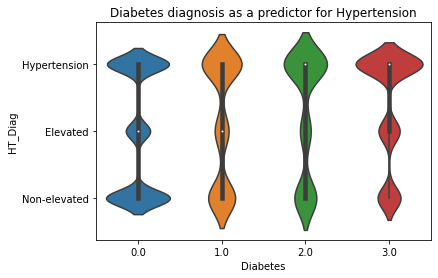

In [10]:
# Notice the categories of Diabetes are mixed numerical and categorical
# 0 SP Not told has diabetes
# 1 SP Told has diabetes when under 40
# 2 SP Told borderline diabetes
# 3 SP Told has diabetes when over 40
# Let's check that our encoding makes sense


ax = sns.violinplot(x = 'Diabetes', y = 'HT_Diag', data = df)
ax.set_yticks([0,1,2])
ax.set_yticklabels(diag_labels)
ax.set_title('Diabetes diagnosis as a predictor for Hypertension')
plt.show()
# We can see increase in the Diabetes index correlates to increasing probability of Hypertension, which validates the index.

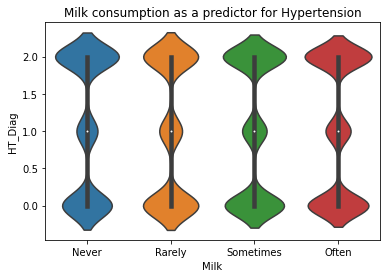

In [11]:
# Past 30 day milk product consumption
#0  Never
#1  Rarely-less than once a week
#2  Sometimes-once a week or more, but less than once a day
#3  Often-once a day or more?


ax = sns.violinplot(x = 'Milk', y = 'HT_Diag', data = df)
ax.set_xticks([0,1,2,3])
ax.set_xticklabels(['Never','Rarely','Sometimes','Often'])
ax.set_title('Milk consumption as a predictor for Hypertension')
plt.show()

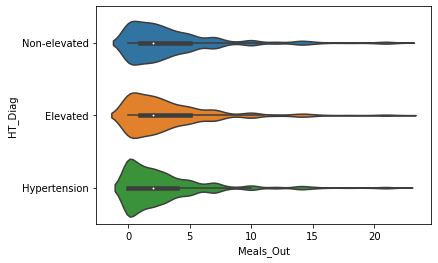

In [12]:


ax = sns.violinplot(x =   'Meals_Out',y ='HT_Diag', data = df,orient='h' )
ax.set_yticks([0,1,2])
ax.set_yticklabels(diag_labels)
plt.show()

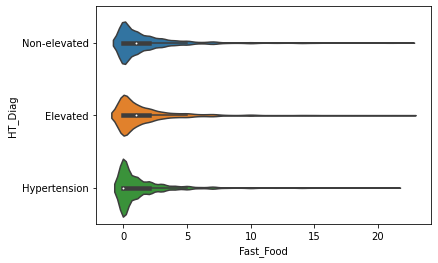

In [13]:

ax = sns.violinplot( x = 'Fast_Food',y = 'HT_Diag', data = df,orient ='h')
ax.set_yticks([0,1,2])
ax.set_yticklabels(diag_labels)
plt.show()

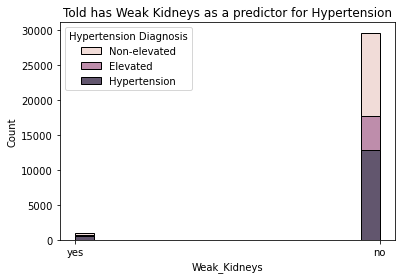

In [14]:
# HT_YN:  Has SP ever been told by a doctor or other health professional
#         that they had weak or failing kidneys?
#         Do not include kidney stones, bladder infections, or incontinence.

ax = sns.histplot(
        data = df,  
        hue = 'HT_Diag', x = 'Weak_Kidneys',
        multiple = 'stack') 
ax.legend_.set_title('Hypertension Diagnosis') 
for t, l in zip(ax.legend_.texts, diag_labels): t.set_text(l)
ax.set_xticks([1,2])
ax.set_xticklabels(YN)
ax.set_title('Told has Weak Kidneys as a predictor for Hypertension')

plt.show() 

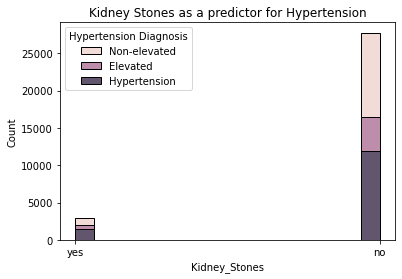

In [15]:
# HT_YN:  Ever had kidney stones?

ax = sns.histplot(
        data = df,  
         x = 'Kidney_Stones', hue = 'HT_Diag',
        multiple = 'stack') 
ax.legend_.set_title('Hypertension Diagnosis') 
for t, l in zip(ax.legend_.texts, diag_labels): t.set_text(l)
ax.set_xticks([1,2])
ax.set_xticklabels(YN)
ax.set_title('Kidney Stones as a predictor for Hypertension')

plt.show() 

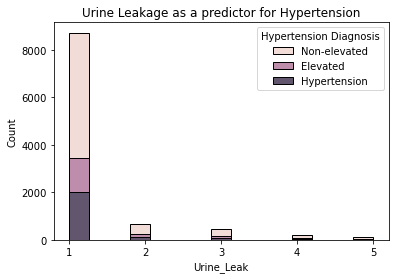

In [16]:
young_df = df[df['Age'] < 40]
ax = sns.histplot(
        data = young_df,  
         x = 'Urine_Leak', hue = 'HT_Diag',
        multiple = 'stack') 
ax.legend_.set_title('Hypertension Diagnosis') 
for t, l in zip(ax.legend_.texts, diag_labels): t.set_text(l)
ax.set_xticks([1,2,3,4,5])
#ax.set_xticklabels(YN)
ax.set_title('Urine Leakage as a predictor for Hypertension')

plt.show() 

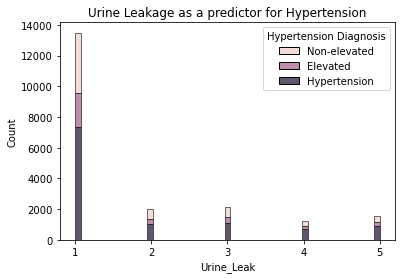

In [17]:
old_df = df[df['Age'] >= 40]
ax = sns.histplot(
        data = old_df,  
         x = 'Urine_Leak', hue = 'HT_Diag',
        multiple = 'stack') 
ax.legend_.set_title('Hypertension Diagnosis') 
for t, l in zip(ax.legend_.texts, diag_labels): t.set_text(l)
ax.set_xticks([1,2,3,4,5])
#ax.set_xticklabels(YN)
ax.set_title('Urine Leakage as a predictor for Hypertension')

plt.show() 

In [22]:
df[['PAQ650', 'PAQ665']].value_counts()

PAQ650  PAQ665
2.0     2.0       16181
        1.0        7803
1.0     1.0        4401
        2.0        2250
dtype: int64

In [23]:
df[['PAQ605', 'PAQ620']].value_counts()

PAQ605  PAQ620
2.0     2.0       18240
        1.0        6410
1.0     1.0        4699
        2.0        1286
dtype: int64

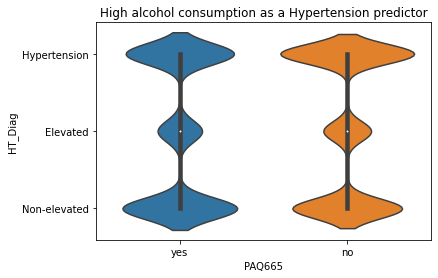

In [27]:

ax = sns.violinplot(x = 'PAQ665', y = 'HT_Diag', data = df)
YN = ['yes', 'no']
ax.set_xticklabels(YN)
ax.set_yticks([0,1,2])
ax.set_yticklabels(diag_labels)
ax.set_title('High alcohol consumption as a Hypertension predictor')
plt.show()

<AxesSubplot:xlabel='PHAFSTHR', ylabel='LBXGLU'>

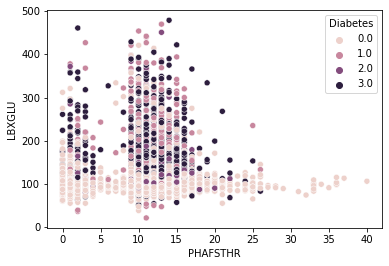

In [30]:
sns.scatterplot(data = df, x = 'PHAFSTHR',y = 'LBXGLU',hue = 'Diabetes')